# Vectors
In this tutorial we refresh some knowledge on vectors.

In meteorology and climatology we often work with variables that have four dimensions: $x$, $y$, $z$ and $t$, which represent the variable in the three-dimensional space and in time. These variables can be split into two categories: scalars and vectors. Scalars, such as temperature, humidity and pressure do not have a direction, whereas vectors, such as wind or the temperature gradient do. In this tutorial, we refresh the basics of vectors, their notation and related rules and mathematical operations.

We express vectors using bold letters: $\boldsymbol{u}$ is the wind vector. This vector is defined as:

$$\boldsymbol{u} \equiv \left( u, v, w\right).$$

Its three components are thus the east-west wind $u$, the north-south wind $v$ and the vertical wind $w$.

a) Calculate the gradient of the wind $\boldsymbol{u}$. Is this a scalar or a vector?

In [6]:
from ipywidgets import interact # Package ipywidgets contains the features of interactive notebooks.
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as pl  # Matplotlib is a scientific plotting package.
# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%pylab inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [12,6]}) # Set the standard figure size.

Populating the interactive namespace from numpy and matplotlib


In [10]:
nc_file = nc.Dataset("data/test.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]
u   = nc_file.variables["u" ][-1,0,:,:]
v   = nc_file.variables["v" ][-1,0,:,:]
zg  = nc_file.variables["z" ][-1,0,:,:]

Calculate a scalar $u_{tot}$ that is the magnitude of the wind vector:

In [11]:
# Write the correct Python code below, replace the random numbers with the correct code.
# u_tot = np.random.rand(lat.size, lon.size)
u_tot = (u**2 + v**2)**.5

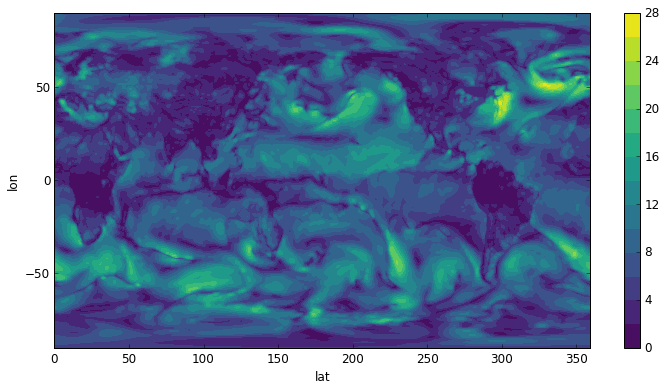

In [12]:
pl.contourf(lon, lat, u_tot, 16, cmap=pl.cm.viridis)
pl.colorbar()
pl.xlim(lon.min(), lon.max())
pl.ylim(lat.min(), lat.max())
pl.xlabel('lat')
pl.ylabel('lon');

___

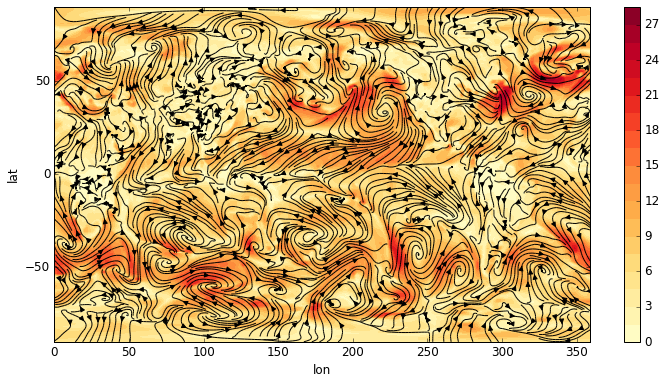

In [15]:
def plot_p_u_vector(lon_min=lon.min(), lon_max=lon.max(), lat_min=lat.min(), lat_max=lat.max()):
    pl.contourf(lon, lat, u_tot, 20, cmap=pl.cm.YlOrRd)
    pl.colorbar()
    pl.streamplot(lon, lat, u, v, density=5, color='k')
    pl.xlim(lon_min, lon_max)
    pl.ylim(lat_min, lat_max)
    pl.xlabel('lon')
    pl.ylabel('lat')
    #pl.savefig('circulation.pdf');

interact(plot_p_u_vector, lon_min=(0, 360), lon_max=(0,360), lat_min=(-90, 90), lat_max=(-90, 90), __manual = True);

The plot above shows the wind speed:

$$ u = 10 $$

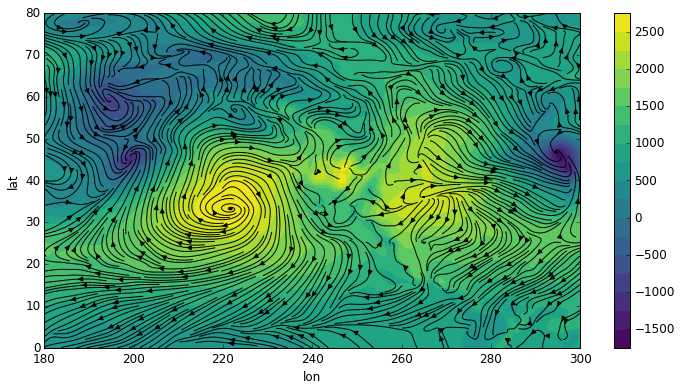

In [16]:
step = 2
lon_min = 180
lon_max = 300
lat_min =   0
lat_max =  80
ilon_min = (abs(lon-lon_min)).argmin()
ilon_max = (abs(lon-lon_max)).argmin()
ilat_min = (abs(lat-lat_min)).argmin()
ilat_max = (abs(lat-lat_max)).argmin()
ilat_min, ilat_max = ilat_max, ilat_min

pl.contourf(lon[ilon_min:ilon_max+1],
            lat[ilat_min:ilat_max+1],
            zg[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
            20, cmap=pl.cm.viridis)
pl.colorbar()

pl.streamplot(lon[ilon_min:ilon_max+1],
              lat[ilat_min:ilat_max+1],
              u[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              v[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              density=4, color='k')

#pl.quiver(lon[ilon_min:ilon_max+1:step],
#          lat[ilat_min:ilat_max+1:step],
#          u[ilat_min:ilat_max+1:step, ilon_min:ilon_max+1:step],
#          v[ilat_min:ilat_max+1:step, ilon_min:ilon_max+1:step],
#          pivot='mid')

pl.xlim(lon_min, lon_max)
pl.ylim(lat_min, lat_max)
pl.xlabel('lon')
pl.ylabel('lat');

The divergence of a vector is a scalar. In vector notation, we write it down as:
$$\text{div} \left( \boldsymbol{u} \right) \equiv \nabla \cdot \boldsymbol{u}$$
Expand the right hand side of the previous expression:

$$\nabla \cdot \boldsymbol{u} = \dots$$
$$\nabla \cdot \boldsymbol{u} = \dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} $$

What happens when $$\nabla \cdot \boldsymbol{u} = 0 $$

Now we will calculate and show the divergence of the wind with the data.

In [ ]:
r_earth = 6.37e6
dx = 2.*np.pi*r_earth*cos(np.pi/180*lat) / lon.size
dy = np.pi*r_earth / lat.size
divu = np.zeros(u.shape)
for l in range(lat.size):
    divu[l,:] += np.gradient(u[l,:], dx[l])
for l in range(lon.size):
    divu[:,l] += np.gradient(v[:,l], dy)

In [ ]:
divu_max = (abs(divu[ilat_min:ilat_max+1, ilon_min:ilon_max+1]).max())
divu_range = np.linspace(-divu_max, divu_max, 20)
pl.contourf(lon[ilon_min:ilon_max+1],
            lat[ilat_min:ilat_max+1],
            divu[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
            divu_range, cmap=pl.cm.RdBu, extend='both')
pl.colorbar()

pl.streamplot(lon[ilon_min:ilon_max+1],
              lat[ilat_min:ilat_max+1],
              u[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              v[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              density=4, color='k')

pl.xlim(lon_min, lon_max)
pl.ylim(lat_min, lat_max)
pl.xlabel('lon')
pl.ylabel('lat');

In [ ]:
dlon = 2.*np.pi*cos(np.pi/180*lat) / lon.size
dlat = np.pi / lat.size
divu_sphere = np.zeros(u.shape)
cos_lat = np.cos(np.pi/180.*lat)
for l in range(lat.size):
    divu_sphere[l,:] += np.gradient(u[l,:], dlon[l]) / (r_earth*cos_lat[l])
for l in range(lon.size):
    divu_sphere[:,l] += np.gradient(cos_lat*v[:,l], dlat) / (r_earth*cos_lat)

In [ ]:
divu_sphere_max = (abs(divu_sphere[ilat_min:ilat_max+1, ilon_min:ilon_max+1]).max())
divu_sphere_range = np.linspace(-divu_sphere_max, divu_sphere_max, 20)
pl.contourf(lon[ilon_min:ilon_max+1],
            lat[ilat_min:ilat_max+1],
            divu_sphere[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
            divu_sphere_range, cmap=pl.cm.RdBu, extend='both')
pl.colorbar()

pl.streamplot(lon[ilon_min:ilon_max+1],
              lat[ilat_min:ilat_max+1],
              u[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              v[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              density=4, color='k')

pl.xlim(lon_min, lon_max)
pl.ylim(lat_min, lat_max)
pl.xlabel('lon')
pl.ylabel('lat');

In [ ]:
pl.contourf(lon[ilon_min:ilon_max+1],
            lat[ilat_min:ilat_max+1],
            divu       [ilat_min:ilat_max+1, ilon_min:ilon_max+1]-
            divu_sphere[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
            divu_sphere_range, cmap=pl.cm.RdBu, extend='both')
pl.colorbar()

pl.streamplot(lon[ilon_min:ilon_max+1],
              lat[ilat_min:ilat_max+1],
              u[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              v[ilat_min:ilat_max+1, ilon_min:ilon_max+1],
              density=4, color='k')

pl.xlim(lon_min, lon_max)
pl.ylim(lat_min, lat_max)
pl.xlabel('lon')
pl.ylabel('lat');

Besides a dot product we often also see a cross product in meteorological equations, for example when you calculate vorticity: $$  \nabla \times \boldsymbol{u} $$

Expand the right hand side of the previous expression.

$$\nabla \times \boldsymbol{u} = \dots$$
$$\nabla \times \boldsymbol{u} = $$

In the equation below the geostrophic wind is given in vector form. Write down the different components.

$$ \boldsymbol{u}_{g} = k \times \dfrac{1}{\rho f} \nabla p $$

# 2. Taylor

$$
f \left( x + \delta x, y, z, t \right) = f \left( x,y,z,t \right) 
    + \left( \delta x \right) \left. \dfrac{\partial f}{\partial x} \right|_x
    + \dfrac{ \left( \delta x \right)^2 }{2!} \left. \dfrac{\partial^2 f}{\partial x^2} \right|_x
    + \dfrac{ \left( \delta x \right)^3 }{3!} \left. \dfrac{\partial^3 f}{\partial x^3} \right|_x + \cdots
$$

If $\delta x$ is an inifinitesimal element $dx$ and the limit $dx \rightarrow 0$ is taken then
$$
\lim_{dx \rightarrow 0} \dfrac{f(x + dx, y, z, t) - f(x, y, z, t)}{dx} = \dfrac{\partial f}{\partial x}
$$

This Taylor approximation and infinitesimal control volumes are used in atmospheric science to express budgets of mass momentum and energy. 
Two types of control volumes are used in fluid dynamics: the Eulerian and Lagrangian frame.

Here, we consider a fixed infinitesimal box of size $\delta x \times \delta y \times \delta z$.
In such a box the net rate of mass in- and outflow trough the sides must equal the rate of accumulation of mass within the volume.

$$
  \rho \left( x, y, z, t + \delta t \right) \delta x\,\delta y\,\delta z
- \rho \left( x, y, z, t \right) \delta x\,\delta y\,\delta z \\
+ \rho u \left( x + \tfrac{1}{2}\delta x, y, z, t \right) \delta y\,\delta z\,\delta t
- \rho u \left( x - \tfrac{1}{2}\delta x, y, z, t \right) \delta y\,\delta z\,\delta t \\
+ \rho v \left( x, y + \tfrac{1}{2}\delta y, z, t \right) \delta x\,\delta z\,\delta t
- \rho v \left( x, y - \tfrac{1}{2}\delta y, z, t \right) \delta x\,\delta z\,\delta t \\
+ \rho w \left( x, y, z + \tfrac{1}{2}\delta z,t  \right) \delta x\,\delta y\,\delta t
- \rho w \left( x, y, z - \tfrac{1}{2}\delta z, t \right) \delta x\,\delta y\,\delta t = 0
$$

* Divide by $\delta x\,\delta y\,\delta z\,\delta t$
* Apply the Taylor approximation

You have now derived the continuity equation from an Eulerian frame (mass divergence form).

$$
\dfrac{\partial \rho}{\partial t} + \nabla \rho U = 0
$$

You can rewrite this equation into the form of a Lagrangian frame (velocity divergence form).

$$
\dfrac{D \rho}{D t} + \rho \nabla U = 0
$$

What happens with the continuity equation if we assume: $$ \rho = \rho_{0}$$